#Análise e Contrução de Modelos de Machine Learning que façam a previsão de temperatura

##Pré-processamento dos dados:

Vamos começar primeiramente importando as bibliotecas e a base de dados 

In [64]:
import pandas as pd

In [65]:
#Importa os dados do github
URL = "https://raw.githubusercontent.com/nathanaelduque/SelecaoFIEC/master/jena_climate_2009_2016.csv?token=GHSAT0AAAAAAB6BPCDMDIZ654MB3BF4ZFJMY63AV2A"
dados=pd.read_csv(URL, index_col=['Date Time'])
dados.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [66]:
dados.shape

(420551, 14)

In [67]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420551 entries, 01.01.2009 00:10:00 to 01.01.2017 00:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   p (mbar)         420551 non-null  float64
 1   T (degC)         420551 non-null  float64
 2   Tpot (K)         420551 non-null  float64
 3   Tdew (degC)      420551 non-null  float64
 4   rh (%)           420551 non-null  float64
 5   VPmax (mbar)     420551 non-null  float64
 6   VPact (mbar)     420551 non-null  float64
 7   VPdef (mbar)     420551 non-null  float64
 8   sh (g/kg)        420551 non-null  float64
 9   H2OC (mmol/mol)  420551 non-null  float64
 10  rho (g/m**3)     420551 non-null  float64
 11  wv (m/s)         420551 non-null  float64
 12  max. wv (m/s)    420551 non-null  float64
 13  wd (deg)         420551 non-null  float64
dtypes: float64(14)
memory usage: 48.1+ MB


Temos 420.551 registros na nossa base de dados, e 15 colunas(contando com o index), sendo uma delas a variável que queremos prever (TdegC) e as outras 14 colunas sendo features. O dados.info mostra que não temos nenhuma coluna em branco.

Além disso, nossa base de dados mostra os dados de 10 em 10 minutos, gostaríamos de ter esses dados de hora em hora.Então iremos transformar esse conjunto de dados tirando o valor médio dos nossos registros a cada hora.

Para fazer a transformação primeiramente devemos converter a coluna "Date Time" do formato string para o formato *Datetime*:

In [68]:
dados.index= pd.to_datetime(dados.index,dayfirst = True)
dados.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [69]:
dados_hora = dados.resample('1H').mean()
dados_hora.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:00:00,996.528000,-8.304000,265.118000,-9.120000,93.780000,3.260000,3.058000,0.202000,1.910000,3.068000,1309.196000,0.520000,1.002000,174.460000
2009-01-01 01:00:00,996.525000,-8.065000,265.361667,-8.861667,93.933333,3.323333,3.121667,0.201667,1.951667,3.133333,1307.981667,0.316667,0.711667,172.416667
2009-01-01 02:00:00,996.745000,-8.763333,264.645000,-9.610000,93.533333,3.145000,2.940000,0.201667,1.836667,2.950000,1311.816667,0.248333,0.606667,196.816667
2009-01-01 03:00:00,996.986667,-8.896667,264.491667,-9.786667,93.200000,3.111667,2.898333,0.210000,1.811667,2.906667,1312.813333,0.176667,0.606667,157.083333
2009-01-01 04:00:00,997.158333,-9.348333,264.026667,-10.345000,92.383333,3.001667,2.775000,0.231667,1.733333,2.780000,1315.355000,0.290000,0.670000,150.093333


A variável "Tpot (K)" é uma simples conversão da nossa variável de interesse de Kelvin para Celsius e não será necessária na nossa Analise, então vamos retirá-la do dataset.

In [70]:
dados_hora = dados_hora.drop('Tpot (K)',axis = 1)
dados_hora.head()

,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,
2009-01-01 00:00:00,996.528000,-8.304000,-9.120000,93.780000,3.260000,3.058000,0.202000,1.910000,3.068000,1309.196000,0.520000,1.002000,174.460000
2009-01-01 01:00:00,996.525000,-8.065000,-8.861667,93.933333,3.323333,3.121667,0.201667,1.951667,3.133333,1307.981667,0.316667,0.711667,172.416667
2009-01-01 02:00:00,996.745000,-8.763333,-9.610000,93.533333,3.145000,2.940000,0.201667,1.836667,2.950000,1311.816667,0.248333,0.606667,196.816667
2009-01-01 03:00:00,996.986667,-8.896667,-9.786667,93.200000,3.111667,2.898333,0.210000,1.811667,2.906667,1312.813333,0.176667,0.606667,157.083333
2009-01-01 04:00:00,997.158333,-9.348333,-10.345000,92.383333,3.001667,2.775000,0.231667,1.733333,2.780000,1315.355000,0.290000,0.670000,150.093333


Temos agora nosso novo dataset "dados_hora" que dá os valores de hora em hora.

Porém só poderemos utilizar dados para prever pelo menos dois passos a frente, ou seja, os dados de 2009-01-01 00:00:00 só podem ser usados em 2009-01-01 02:00:00, sendo assim, vamos dar um shift nos nosso dados!

In [71]:
dados_hora['y_shifted'] = dados_hora['T (degC)'].shift(periods = -2)
dados_hora.head()

,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),y_shifted
Date Time,,,,,,,,,,,,,,
2009-01-01 00:00:00,996.528000,-8.304000,-9.120000,93.780000,3.260000,3.058000,0.202000,1.910000,3.068000,1309.196000,0.520000,1.002000,174.460000,-8.763333
2009-01-01 01:00:00,996.525000,-8.065000,-8.861667,93.933333,3.323333,3.121667,0.201667,1.951667,3.133333,1307.981667,0.316667,0.711667,172.416667,-8.896667
2009-01-01 02:00:00,996.745000,-8.763333,-9.610000,93.533333,3.145000,2.940000,0.201667,1.836667,2.950000,1311.816667,0.248333,0.606667,196.816667,-9.348333
2009-01-01 03:00:00,996.986667,-8.896667,-9.786667,93.200000,3.111667,2.898333,0.210000,1.811667,2.906667,1312.813333,0.176667,0.606667,157.083333,-9.716667
2009-01-01 04:00:00,997.158333,-9.348333,-10.345000,92.383333,3.001667,2.775000,0.231667,1.733333,2.780000,1315.355000,0.290000,0.670000,150.093333,-9.298333


Sendo assim, as duas ultimas linhas não irão nos servir:

In [72]:
dados_hora = dados_hora[:-2]

In [73]:
dados_hora.shape

(70127, 14)

In [74]:
dados_hora.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70127 entries, 2009-01-01 00:00:00 to 2016-12-31 22:00:00
Freq: H
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   p (mbar)         70039 non-null  float64
 1   T (degC)         70039 non-null  float64
 2   Tdew (degC)      70039 non-null  float64
 3   rh (%)           70039 non-null  float64
 4   VPmax (mbar)     70039 non-null  float64
 5   VPact (mbar)     70039 non-null  float64
 6   VPdef (mbar)     70039 non-null  float64
 7   sh (g/kg)        70039 non-null  float64
 8   H2OC (mmol/mol)  70039 non-null  float64
 9   rho (g/m**3)     70039 non-null  float64
 10  wv (m/s)         70039 non-null  float64
 11  max. wv (m/s)    70039 non-null  float64
 12  wd (deg)         70039 non-null  float64
 13  y_shifted        70039 non-null  float64
dtypes: float64(14)
memory usage: 8.0 MB


Como o shape nos dá 70127 linhas e o info nos dá 70039 linhas, temos que existem dados faltando no nosso conjunto de dados, vamos ver quais dados são esses:

In [75]:
dados_hora[dados_hora['rh (%)'].isnull()]

,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),y_shifted
Date Time,,,,,,,,,,,,,,
2014-09-24 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-24 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-24 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-24 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-24 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-28 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-28 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-28 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Não temos dados dos dias 09/04/2014 , 25/10/2016 , 26/10/2016 ,27/10/2016 e 28/0/2016!

Então, vamos refazer o conjunto dados_hora da seguinte maneira:


In [76]:
dados_hora = dados_hora.dropna()
dados_hora.shape

(70035, 14)

In [77]:
dados_hora.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70035 entries, 2009-01-01 00:00:00 to 2016-12-31 22:00:00
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   p (mbar)         70035 non-null  float64
 1   T (degC)         70035 non-null  float64
 2   Tdew (degC)      70035 non-null  float64
 3   rh (%)           70035 non-null  float64
 4   VPmax (mbar)     70035 non-null  float64
 5   VPact (mbar)     70035 non-null  float64
 6   VPdef (mbar)     70035 non-null  float64
 7   sh (g/kg)        70035 non-null  float64
 8   H2OC (mmol/mol)  70035 non-null  float64
 9   rho (g/m**3)     70035 non-null  float64
 10  wv (m/s)         70035 non-null  float64
 11  max. wv (m/s)    70035 non-null  float64
 12  wd (deg)         70035 non-null  float64
 13  y_shifted        70035 non-null  float64
dtypes: float64(14)
memory usage: 8.0 MB


Esse novo conjunto terá 70035 linhas!



##Analisando o conjunto de dados hora a hora

###Baseline

Primeiramente, vamos ver plotar nossos dados:

Text(0.5, 1.0, ' Figura 01 - T (degC) de 2016 até 2017')

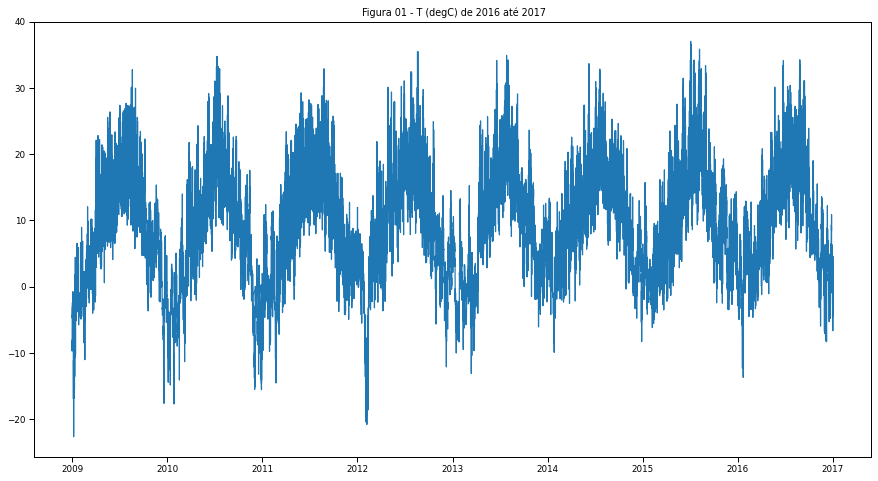

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(dados_hora.index,dados_hora['T (degC)'])
plt.title(" Figura 01 - T (degC) de 2016 até 2017")

Pode-se perceber que todo ano tem-se um pico de temperatura pelos meses de junho / julho, quando é verão no Hemisfério Norte

Vamos analisar somente o ultimo ano:

Text(0.5, 1.0, ' Figura 02 - T (degC) de 2016 até 2017')

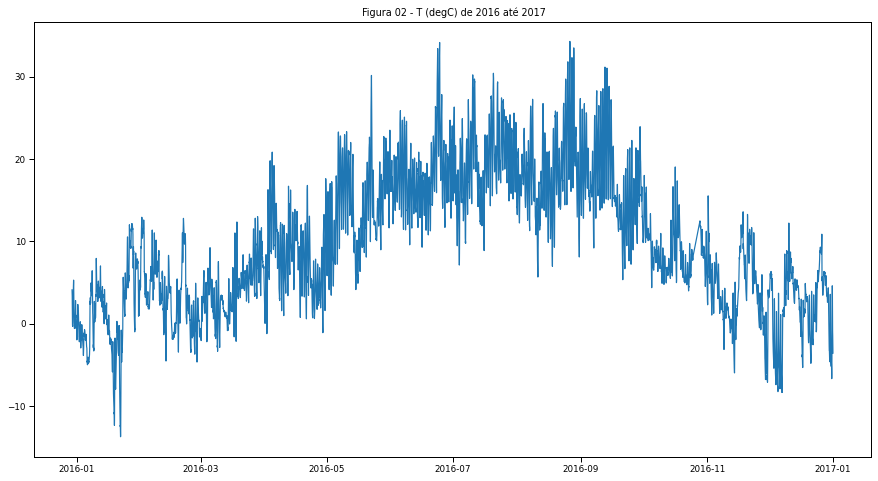

In [79]:
plt.figure(figsize=(15,8))
plt.plot(dados_hora.index[-8760:],dados_hora['T (degC)'][-8760:])
plt.title(" Figura 02 - T (degC) de 2016 até 2017")

A partir desse gráfico, iremos definir a baseline para nossos modelos de ML, ela será dividida em 3 períodos, 1 para o inverno, outra para o verão e outra para outono e primavera, que são as estações de transição.

A *Baseline* será calculada como sendo a temperatura media de cada um desses periodos.

In [80]:
dados_hora['mes'] = dados_hora.index.month
dados_hora.head()

,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),y_shifted,mes
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:00:00,996.528000,-8.304000,-9.120000,93.780000,3.260000,3.058000,0.202000,1.910000,3.068000,1309.196000,0.520000,1.002000,174.460000,-8.763333,1
2009-01-01 01:00:00,996.525000,-8.065000,-8.861667,93.933333,3.323333,3.121667,0.201667,1.951667,3.133333,1307.981667,0.316667,0.711667,172.416667,-8.896667,1
2009-01-01 02:00:00,996.745000,-8.763333,-9.610000,93.533333,3.145000,2.940000,0.201667,1.836667,2.950000,1311.816667,0.248333,0.606667,196.816667,-9.348333,1
2009-01-01 03:00:00,996.986667,-8.896667,-9.786667,93.200000,3.111667,2.898333,0.210000,1.811667,2.906667,1312.813333,0.176667,0.606667,157.083333,-9.716667,1
2009-01-01 04:00:00,997.158333,-9.348333,-10.345000,92.383333,3.001667,2.775000,0.231667,1.733333,2.780000,1315.355000,0.290000,0.670000,150.093333,-9.298333,1


In [81]:
baseline_verao =  dados_hora.query("mes in [7,8,9]")['T (degC)'].mean()
baseline_verao

17.40030914345472

In [82]:
baseline_inverno = dados_hora.query("mes in [1,2,3]")['T (degC)'].mean()
baseline_inverno

1.6965087591053658

In [83]:
baseline_transicao = dados_hora.query("mes in [4,5,6,10,11,12]")['T (degC)'].mean()
baseline_transicao

9.265723302909299

Vamos inserir nossa *baseline* no dataset:

Text(0.5, 1.0, 'Figura 03 - Baseline')

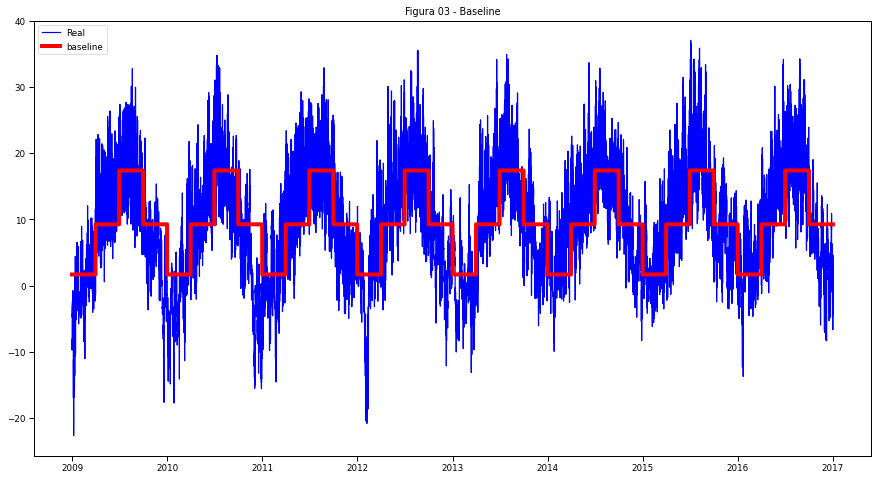

In [84]:
import numpy as np

dados_hora['baseline'] = np.where(dados_hora['mes'].isin([7,8,9]), baseline_verao,np.where(dados_hora['mes'].isin([1,2,3]),baseline_inverno,baseline_transicao))

# Vamos plotar a baseline do problema
plt.figure(figsize=(15,8))
plt.plot(dados_hora.index,dados_hora['T (degC)'],color = 'blue', label = 'Real')
plt.plot(dados_hora.index, dados_hora.baseline,color = 'red',linewidth=4, label = 'baseline')
plt.legend(loc="upper left")
plt.title("Figura 03 - Baseline")


Vamos calcular o desvio quadrático médio da nossa baseline:

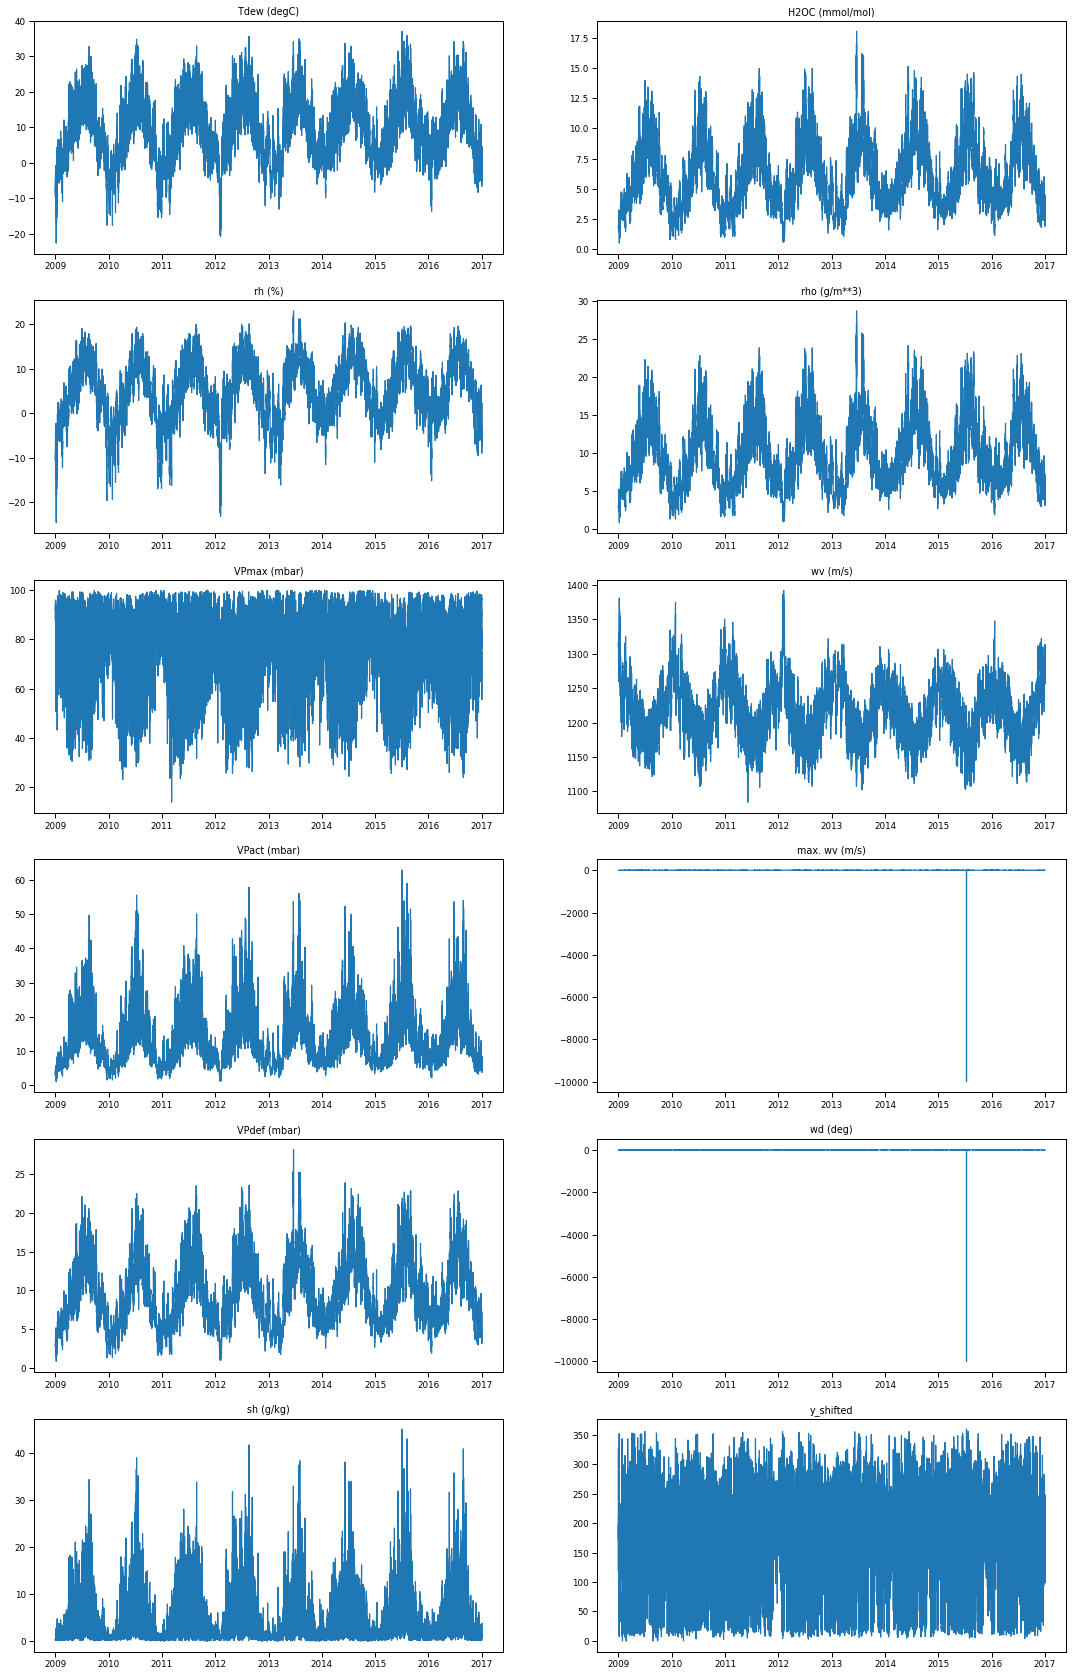

In [85]:
#Pegando os títulos dos gráficos
titulos = list(dados_hora.columns.values)

#Variável auxiliar para plottar os gráficos
aux= 1


fig, axs = plt.subplots(6,2)
fig.set_size_inches(18.5, 30)
#plt.figure(figsize=(15,8))
for j in range(0,2):
  for i in range(0,6):
    axs[i,j].plot(dados_hora.index,dados_hora.iloc[:,aux])
    axs[i,j].set_title(titulos[aux+1]) # + 1 pq o primeiro é "Date Time"
    aux+=1

                 

Por esse gráfico podemos ver que,com exceção "max.wv(m/s)" e "wd(deg)", todas as variáveis são séries temporais.

Devido esse fato, dependemos menos da variável data, uma vez a maioria das variáveis utilizadas também variam junto dela.


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse_base = mean_squared_error(dados_hora['T (degC)'], dados_hora.baseline)
mae_base = mean_absolute_error(dados_hora['T (degC)'], dados_hora.baseline)
rmse_base = sqrt(mse_base)
print("rmse:",rmse_base,",mae:",mae_base)

rmse: 6.323585513087418 ,mae: 4.96198868840917


Devemos bater esses valores de rmse e mae.

Vamos analisar agora as outras variáveis através de um gráfico agrupado:

###Escolha das variáveis no modelo de ML

Agora queremos ver quais informações mais se correlacionam com a variavável "T(degC)" e quais menos correlacionam, para assim podermos contruir nosso modelo de *Machine Learning* de maneira que ele só leve em conta dados relevantes para o processo.

Veremos isso primeiramente de uma maneira gráfica:

In [87]:
dados_hora = dados_hora.reset_index()
dados_hora.head()

,Date Time,p (mbar),T (degC),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg),y_shifted,mes,baseline
0,2009-01-01 00:00:00,996.528000,-8.304000,-9.120000,93.780000,3.260000,3.058000,0.202000,1.910000,3.068000,1309.196000,0.520000,1.002000,174.460000,-8.763333,1,1.696509
1,2009-01-01 01:00:00,996.525000,-8.065000,-8.861667,93.933333,3.323333,3.121667,0.201667,1.951667,3.133333,1307.981667,0.316667,0.711667,172.416667,-8.896667,1,1.696509
2,2009-01-01 02:00:00,996.745000,-8.763333,-9.610000,93.533333,3.145000,2.940000,0.201667,1.836667,2.950000,1311.816667,0.248333,0.606667,196.816667,-9.348333,1,1.696509
3,2009-01-01 03:00:00,996.986667,-8.896667,-9.786667,93.200000,3.111667,2.898333,0.210000,1.811667,2.906667,1312.813333,0.176667,0.606667,157.083333,-9.716667,1,1.696509
4,2009-01-01 04:00:00,997.158333,-9.348333,-10.345000,92.383333,3.001667,2.775000,0.231667,1.733333,2.780000,1315.355000,0.290000,0.670000,150.093333,-9.298333,1,1.696509


Text(0.5, 1.15, 'Figura 04 - Dispersão entre as variáveis')

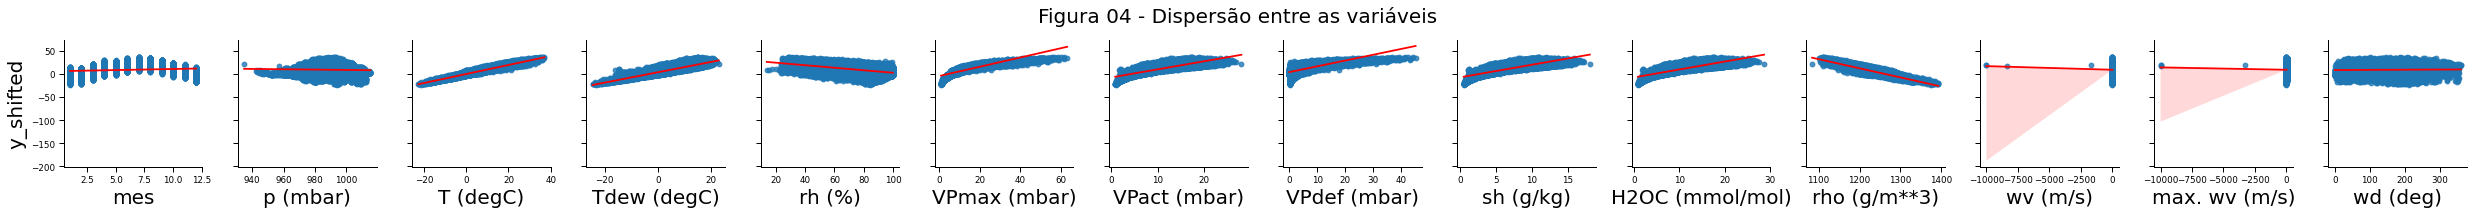

In [88]:
import seaborn as sns
sns.set_context("paper", rc={"axes.labelsize":20})
ax=sns.pairplot(dados_hora,y_vars='y_shifted',x_vars=['mes','p (mbar)','T (degC)','Tdew (degC)','rh (%)','VPmax (mbar)','VPact (mbar)','VPdef (mbar)',
                                                'sh (g/kg)','H2OC (mmol/mol)','rho (g/m**3)','wv (m/s)','max. wv (m/s)',
                                                'wd (deg)'],kind='reg',plot_kws={'line_kws':{'color':'red'}})
ax.fig.suptitle('Figura 04 - Dispersão entre as variáveis',fontsize=20,y=1.15)



A importância de analisarmos esse gráfico é que através dele conseguimos ver se alguma das variáveis possui um comportamento que lembre alguma curva conhecida, como é o caso das variáveis  "VPmax (mbar)","VPact (mbar)","VPdef (mbar)", "sh (g/kg)" e "H2OC (mmol/mol)", que parecem possuir uma relação logarítmica com nossa variável dependente.

Então vamos adicionar na nossa base de dados o log de cada uma dessas variáveis e ver como fica a matriz de correlação de cada uma delas. 

In [89]:

dados_hora['log_VPmax (mbar)'] =  np.log(dados_hora['VPmax (mbar)'])
dados_hora['log_VPact (mbar)'] =  np.log(dados_hora['VPact (mbar)'])
dados_hora['log_VPdef (mbar)'] =  np.log(dados_hora['VPdef (mbar)'])
dados_hora['log_sh (g/kg)'] =  np.log(dados_hora['sh (g/kg)'])
dados_hora['log_H2OC (mmol/mol)'] =  np.log(dados_hora['H2OC (mmol/mol)'])

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Ainda analisando os gráficos da Figura 04 conseguimos ver também que as variáveis "p (mbar)", "wv (m/s)", "max. wv (m/s)", "wd (deg)" não parecem possuir uma forte correlação com nossa variável dependente.Enquanto que o restante parece possuir uma relação bastante forte, porém esse fato é visto melhor através da matriz de correlação

In [90]:
dados_hora.corr().round(2) ['y_shifted']

p (mbar)              -0.04
T (degC)               0.98
Tdew (degC)            0.89
rh (%)                -0.53
VPmax (mbar)           0.93
VPact (mbar)           0.87
VPdef (mbar)           0.73
sh (g/kg)              0.86
H2OC (mmol/mol)        0.86
rho (g/m**3)          -0.94
wv (m/s)              -0.01
max. wv (m/s)         -0.00
wd (deg)               0.03
y_shifted              1.00
mes                    0.19
baseline               0.66
log_VPmax (mbar)       0.98
log_VPact (mbar)       0.89
log_VPdef (mbar)       0.73
log_sh (g/kg)          0.89
log_H2OC (mmol/mol)    0.89
Name: y_shifted, dtype: float64

A matriz nos mostra que "p (mbar)","wv (m/s)","max. wv (m/s)", "wd (deg)" não possuem uma forte relação de correlação com a variável, sendo assim, podem ser excluídas do nosso modelo de ML.

Além disso, vemos também que, com exceção de "VPdef (mbar)",  as versões logarítmicas das variáveis previamente apontadas possuem uma relação mais forte que suas versões originais

Iremos escolher para nosso modelo de ML todas as variáveis que tiverem valor acima 0.85, caso uma variável e o logaritmo dessa variável tiverem valor superior a 0.85, iremos escolher a que possui um valor maior.

In [91]:
dados_final =  dados_hora.drop(['p (mbar)','rh (%)','VPmax (mbar)','VPact (mbar)','sh (g/kg)','H2OC (mmol/mol)'
                                ,'wv (m/s)','max. wv (m/s)','wd (deg)','log_VPdef (mbar)','log_VPdef (mbar)','mes','baseline','VPdef (mbar)'],axis = 1)
dados_final.head()

,Date Time,T (degC),Tdew (degC),rho (g/m**3),y_shifted,log_VPmax (mbar),log_VPact (mbar),log_sh (g/kg),log_H2OC (mmol/mol)
0,2009-01-01 00:00:00,-8.304000,-9.120000,1309.196000,-8.763333,1.181727,1.117761,0.647103,1.121026
1,2009-01-01 01:00:00,-8.065000,-8.861667,1307.981667,-8.896667,1.200968,1.138367,0.668684,1.142097
2,2009-01-01 02:00:00,-8.763333,-9.610000,1311.816667,-9.348333,1.145814,1.078410,0.607952,1.081805
3,2009-01-01 03:00:00,-8.896667,-9.786667,1312.813333,-9.716667,1.135158,1.064136,0.594247,1.067007
4,2009-01-01 04:00:00,-9.348333,-10.345000,1315.355000,-9.298333,1.099168,1.020651,0.550046,1.022451


Iremos novamente calcular a matriz de correlação para checar se todas as nossas features possuem valor acima de 0.87

In [92]:
dados_final.corr().round(2) ['y_shifted']

T (degC)               0.98
Tdew (degC)            0.89
rho (g/m**3)          -0.94
y_shifted              1.00
log_VPmax (mbar)       0.98
log_VPact (mbar)       0.89
log_sh (g/kg)          0.89
log_H2OC (mmol/mol)    0.89
Name: y_shifted, dtype: float64

É importante observar que o mês não possui uma correlação tão forte quanto as outras variáveis, isso se deve porque as outras variáveis também variam com o tempo, já captando o efeito da variação temporal.

##Testando em Modelos de *Machine Learning*

###Separando em 3 e Teste e Normalizando as variáveis

Vamos testar nosso dataset em 3 algoritmos de ML diferentes, O *KNN Regression*, o *Support Vector Regression* e o *Profet*, e comparar qual dos 3 dará um resultado melhor

O primeiro passo é  separar em treino e teste, e depois normalizar o x

In [93]:
from sklearn.preprocessing import PowerTransformer

x  = dados_final.drop(['y_shifted','Date Time'], axis = 1)


pt = PowerTransformer()
pt.fit(x)

x = pt.transform(x)

y = dados_final['y_shifted']

treino_x  = x[:int(0.75*len(x))]

teste_x  = x[int(0.75*len(x)):]

treino_y =  y[:int(0.75*len(y))]

teste_y  = y[int(0.75*len(y)):]

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


###*K-nearest neighbors (KNN)*

Agora vamos importar o primeiro modelo, o *KNN Regression*, apesar de não ser um modelo padrão para séries temporais, mas que ainda assim pode ser aplicado

In [94]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(treino_x, treino_y)

KNeighborsRegressor()

In [95]:
previsoes_knn = knn_model.predict(teste_x)

Vamos agora ver o quão preciso nosso modelo foi

In [96]:
mse_knn = mean_squared_error(teste_y, previsoes_knn)
mae_knn = mean_absolute_error(teste_y, previsoes_knn)
rmse_knn = sqrt(mse_knn)
print("rmse:",rmse_knn,",mae:",mae_knn)

rmse: 1.9187833835525439 ,mae: 1.4445119010655991


Escolhemos o RMSE como parâmetro principal para avaliar se um algoritmo é melhor que o outro, pois ele dá um maior peso a erros maiores!


In [97]:
print("Em comparação com a Baseline, nosso modelo melhorou em {}% com o KNN!".format(round(100*(rmse_base-rmse_knn)/rmse_base,2)))

Em comparação com a Baseline, nosso modelo melhorou em 69.66% com o KNN!


Vamos verificar graficamente essa previsao:

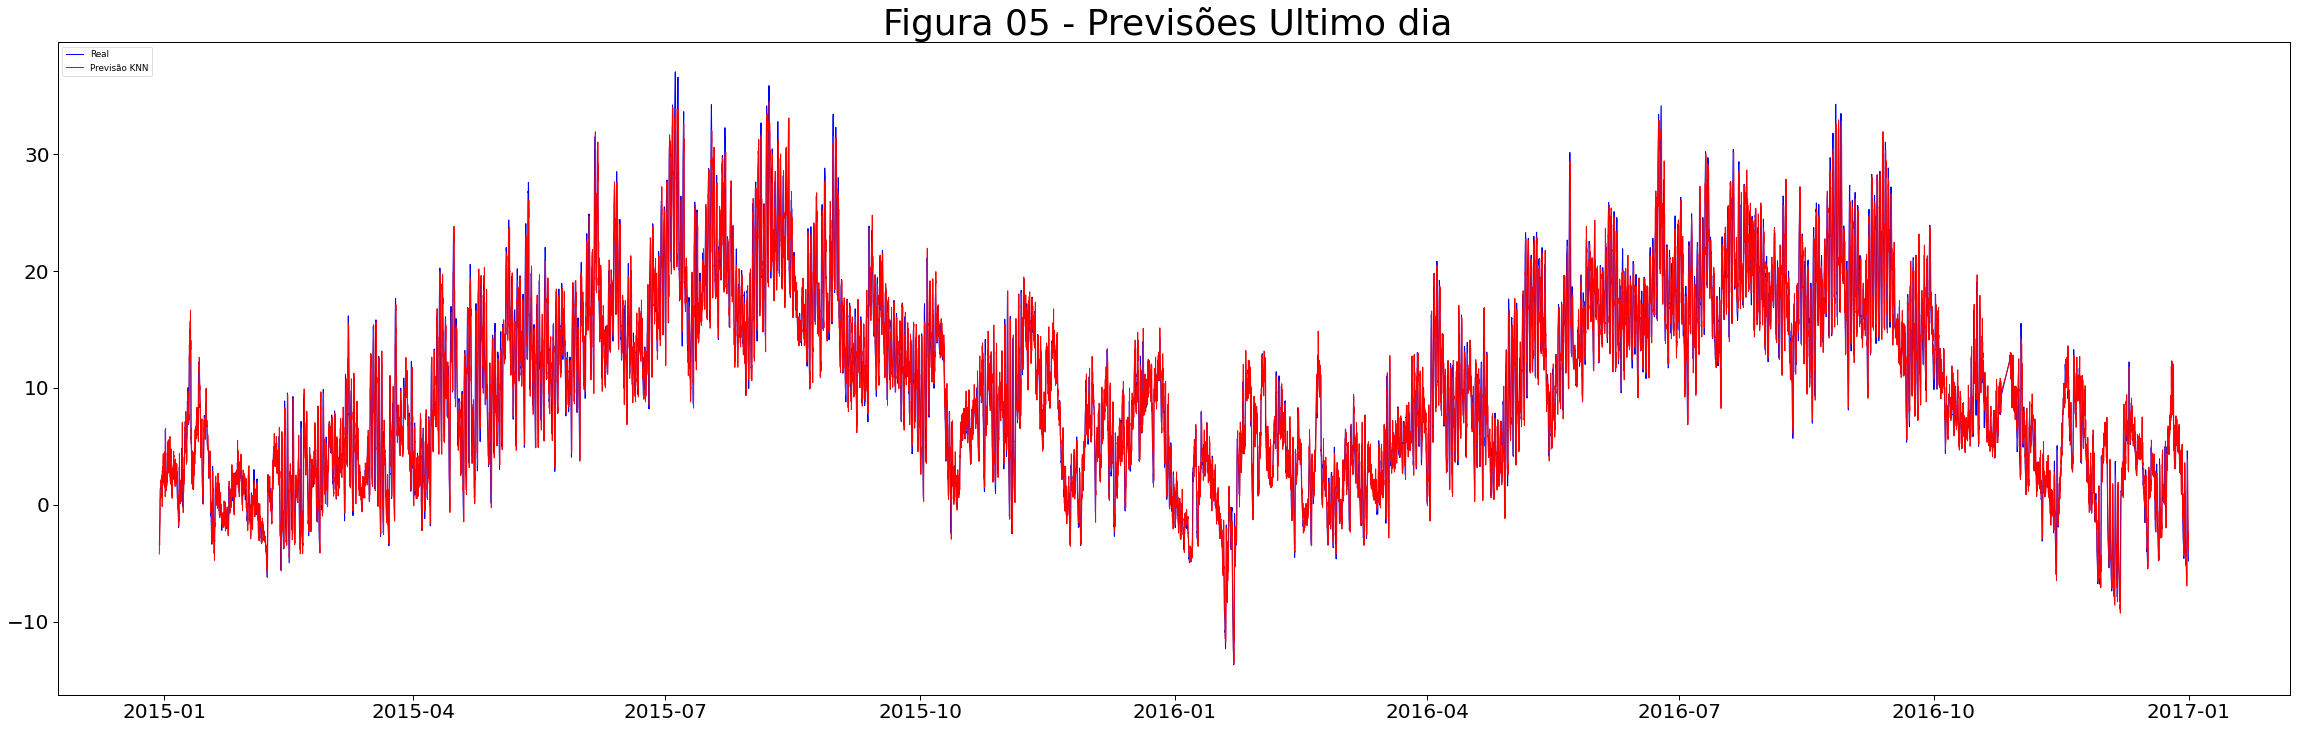

In [98]:

plt.figure(figsize=(40,12))
plt.title("Figura 05 - Previsões Ultimo dia ", fontsize = 36)
plt.plot(dados_final['Date Time'][int(0.75*len(x)):],teste_y,color = 'blue',label = 'Real',linewidth=1)
plt.plot(dados_final['Date Time'][int(0.75*len(x)):],previsoes_knn, color='red',label = 'Previsão KNN',linewidth=1)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Nesse gráfico fica muito ruim de ver o quão precisa foi nossa previsão!
Vamos visualizar melhor no gráfico da previsão do último dia:

In [99]:
ultimo_dia = pt.transform(dados_final.drop(['y_shifted','Date Time'], axis = 1)[-24:])
previsoes_dia_knn = knn_model.predict(ultimo_dia)

In [100]:
mse_knn_ultimo_dia = mean_squared_error(dados_final['T (degC)'][-24:], previsoes_dia_knn)
mae_knn_ultimo_dia = mean_absolute_error(dados_final['T (degC)'][-24:], previsoes_dia_knn)
rmse_knn_ultimo_dia = sqrt(mse_knn_ultimo_dia)
print("rmse ultimo dia usando o knn:",rmse_knn_ultimo_dia,",mae ultimo dia usando o knn:",mae_knn_ultimo_dia)

rmse ultimo dia usando o knn: 0.5059361281236404 ,mae ultimo dia usando o knn: 0.4307638888888889


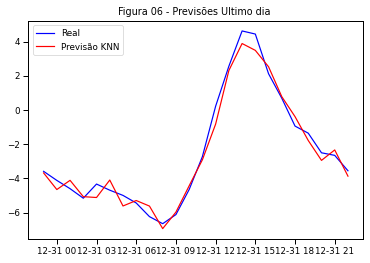

In [101]:
plt.title("Figura 06 - Previsões Ultimo dia ")
plt.plot(dados_final['Date Time'][-24:],dados_final['T (degC)'][-24:],color = 'blue',label = 'Real')
plt.plot(dados_final['Date Time'][-24:],previsoes_dia_knn, color='red',label = 'Previsão KNN')
plt.legend(loc="upper left")
plt.show()

Podemos ver que a previsão está bastante próxima do real!

###*Support Vector Regression (SVR)*

Agora vamos fazer o mesmo procedimento utilizando o SVR, que também não é um modelo específico para séries temporiais, mas que também costuma apresentar bons resultados

In [102]:
from sklearn.svm import SVR

regressor = SVR(kernel='linear')
regressor.fit(treino_x, treino_y)

SVR(kernel='linear')

In [103]:
previsoes_regressor = regressor.predict(teste_x)

In [104]:
mse_regressor = mean_squared_error(teste_y, previsoes_regressor)
mae_regressor = mean_absolute_error(teste_y, previsoes_regressor)
rmse_regressor = sqrt(mse_regressor)
print("rmse:",rmse_regressor,",mae:",mae_regressor)

rmse: 1.7566219883777217 ,mae: 1.2667424870446549


O Regressor melhorou ainda mais nosso modelo!

In [105]:
print("Em comparação com a Baseline, nosso modelo melhorou em {}% com o Regressor!".format(round(100*(rmse_base -rmse_regressor)/rmse_base,2)))

Em comparação com a Baseline, nosso modelo melhorou em 72.22% com o Regressor!


In [106]:
print("Em comparação com o melhor modelo até agora (KNN), nosso modelo melhorou em {}% com o Regressor!".format(round(100*(rmse_knn-rmse_regressor)/rmse_knn,2)))

Em comparação com o melhor modelo até agora (KNN), nosso modelo melhorou em 8.45% com o Regressor!


Vamos fazer também a previsão do ultimo dia:

In [107]:
previsoes_dia_regressor = regressor.predict(ultimo_dia)

In [108]:
mse_regressor_ultimo_dia = mean_squared_error(dados_final['T (degC)'][-24:], previsoes_dia_regressor)
mae_regressor_ultimo_dia = mean_absolute_error(teste_y, previsoes_regressor)
rmse_regressor_ultimo_dia = sqrt(mse_regressor_ultimo_dia)
print("rmse ultimo dia usando o regressor:",rmse_regressor_ultimo_dia,",mae ultimo dia usando o regressor:",mae_regressor_ultimo_dia)

rmse ultimo dia usando o regressor: 0.17264003134580577 ,mae ultimo dia usando o regressor: 1.2667424870446549


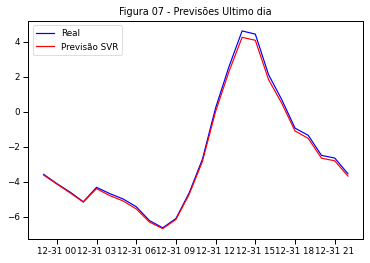

In [109]:
plt.title("Figura 07 - Previsões Ultimo dia")
plt.plot(dados_final['Date Time'][-24:],dados_final['T (degC)'][-24:],color = 'blue',label = 'Real')
plt.plot(dados_final['Date Time'][-24:],previsoes_dia_regressor, color='red',label = 'Previsão SVR')
plt.legend(loc="upper left")
plt.show()

###*Prophet*

Vamos agora utilizar uma biblioteca do Facebook desenvolvida para séries temporais, a *Prophet*.

In [110]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from fbprophet import Prophet

#Fazendo ajustes no dataframe para ele se adequar ao formato dessa biblioteca 

dados_prophet = pd.DataFrame(pt.transform(dados_final.drop(['Date Time','y_shifted'],axis = 1)))
dados_prophet = dados_prophet.rename(columns = {0:'T (degC)' ,1:'Tdew (degC)' ,2:'rho (g/m**3)' ,3:'log_VPmax (mbar)',4: 'log_VPact (mbar)',
                                               5:'log_sh (g/kg)',6: 'log_H2OC (mmol/mol)'})
dados_prophet['ds'] =  dados_final['Date Time']
dados_prophet['y'] = dados_final['y_shifted']

# inicializa o modelo
modelo_prophet = Prophet(interval_width = 0.95)
# adiciona as fetures escolhidas para ajudar na previsão
modelo_prophet.add_regressor('T (degC)')

modelo_prophet.add_regressor('Tdew (degC)')

modelo_prophet.add_regressor('rho (g/m**3)')

modelo_prophet.add_regressor('log_VPmax (mbar)')

modelo_prophet.add_regressor('log_VPact (mbar)')

modelo_prophet.add_regressor('log_sh (g/kg)')

modelo_prophet.add_regressor('log_H2OC (mmol/mol)')



# fit do modelo no treino
modelo_prophet.fit(dados_prophet.iloc[:int(0.75*len(dados_prophet))])
# previsao nos dados de teste
previsao_prophet = modelo_prophet.predict(dados_prophet.iloc[int(0.75*len(dados_prophet)):])

In [112]:
mse_prophet = mean_squared_error(dados_prophet.iloc[int(0.75*len(dados_prophet)):]['y'], previsao_prophet['yhat'])
mae_prophet = mean_absolute_error(dados_prophet.iloc[int(0.75*len(dados_prophet)):]['y'], previsao_prophet['yhat'])
rmse_prophet = sqrt(mse_prophet)
print("rmse prophet:",rmse_prophet,",mae prophet:",mae_prophet)

rmse prophet: 1.268239415350302 ,mae prophet: 0.9503237603142872


A *Prophet* foi a melhor de todas!!

In [113]:
print("Em comparação com a Baseline, nosso modelo melhorou em {}% com o Prophet!".format(round(100*(rmse_base -rmse_prophet)/rmse_base,2)))

Em comparação com a Baseline, nosso modelo melhorou em 79.94% com o Prophet!


In [114]:
print("Em comparação com o melhor modelo até agora (SVR), nosso modelo melhorou em {}% com o Regressor!".format(round(100*(rmse_knn-rmse_regressor)/rmse_knn,2)))

Em comparação com o melhor modelo até agora (SVR), nosso modelo melhorou em 8.45% com o Regressor!


Faremos a previsão do ultimo dia também

In [115]:
previsoes_dia_prophet = modelo_prophet.predict(dados_prophet.iloc[-24:])

In [116]:
mse_prophet_ultimo_dia = mean_squared_error(dados_final['T (degC)'][-24:], previsoes_dia_prophet['yhat'])
mae_prophet_ultimo_dia = mean_absolute_error(dados_final['T (degC)'][-24:], previsoes_dia_prophet['yhat'])
rmse_prophet_ultimo_dia = sqrt(mse_prophet_ultimo_dia)
print("rmse prophet ultimo dia:",rmse_prophet_ultimo_dia,",mae prophet ultimo dia:",mae_prophet_ultimo_dia)

rmse prophet ultimo dia: 1.1855448221161713 ,mae prophet ultimo dia: 1.0802902492774231


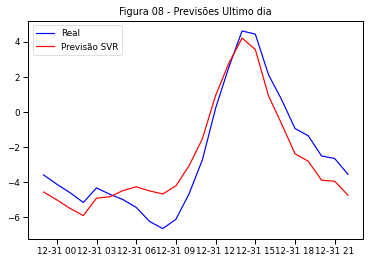

In [117]:
plt.title("Figura 08 - Previsões Ultimo dia")
plt.plot(dados_final['Date Time'][-24:],dados_final['T (degC)'][-24:],color = 'blue',label = 'Real')
plt.plot(dados_final['Date Time'][-24:],previsoes_dia_prophet['yhat'], color='red',label = 'Previsão SVR')
plt.legend(loc="upper left")
plt.show()

##Conclusões:

Vamos preparar uma tabela resumindo nossos modelos

In [118]:
resultados_metricas = {
    'Modelo': ['baseline','KNN', 'SVR', 'Prophet'],
    'MAE': [mae_base,mae_knn, mae_regressor, mae_prophet],
    'MSE': [mse_base,mse_knn, mse_regressor, mse_prophet],
    'RMSE' : [rmse_base,rmse_knn, rmse_regressor, rmse_prophet]
}

resultados_metricas_df = pd.DataFrame(resultados_metricas)
resultados_metricas_df

,Modelo,MAE,MSE,RMSE
0,baseline,4.961989,39.987734,6.323586
1,KNN,1.444512,3.681730,1.918783
2,SVR,1.266742,3.085721,1.756622
3,Prophet,0.950324,1.608431,1.268239


Apesar da Analise do ultimo dia apontar para o SVR como melhor algoritmo, todos os parâmetros calculados apontam para o Prophet como sendo o melhor algoritmo para esse tipo de problema!

Faz bastante sentido, uma vez que essa biblioteca foi desenvolvida especificamente para prever séries temporais,enquanto que as outras duas trazem algoritmos mais genéricos!

Porém os 3 algoritmos apresentam resultados muito melhores que a Baseline! Mostrando assim que os 3 são eficazes na predição.